<a href="https://colab.research.google.com/github/Dagmara-Czarnecka/Covid_19_tracker/blob/main/covid_19_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dash

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import dash
from dash import html, dcc, Input, Output
import threading
from google.colab import output



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df_covid = pd.read_csv('project_1_python.csv')


In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    180477 non-null  int64  
 1   iso_code                 180477 non-null  object 
 2   continent                180477 non-null  object 
 3   location                 180477 non-null  object 
 4   date                     180477 non-null  object 
 5   total_cases              173493 non-null  float64
 6   new_cases                173212 non-null  float64
 7   total_deaths             155323 non-null  float64
 8   new_deaths               155095 non-null  float64
 9   hosp_patients            27152 non-null   float64
 10  total_tests              78326 non-null   float64
 11  new_tests                74509 non-null   float64
 12  tests_per_case           92600 non-null   float64
 13  total_vaccinations       46366 non-null   float64
 14  peop

In [4]:
df_population = df_covid[['location', 'population']].drop_duplicates()


In [5]:
df_population = df_population.sort_values(by='population', ascending=False).head(15)


[Text(0, 0, 'China'),
 Text(1, 0, 'India'),
 Text(2, 0, 'United States'),
 Text(3, 0, 'Indonesia'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Brazil'),
 Text(6, 0, 'Nigeria'),
 Text(7, 0, 'Bangladesh'),
 Text(8, 0, 'Russia'),
 Text(9, 0, 'Mexico'),
 Text(10, 0, 'Japan'),
 Text(11, 0, 'Ethiopia'),
 Text(12, 0, 'Philippines'),
 Text(13, 0, 'Egypt'),
 Text(14, 0, 'Vietnam')]

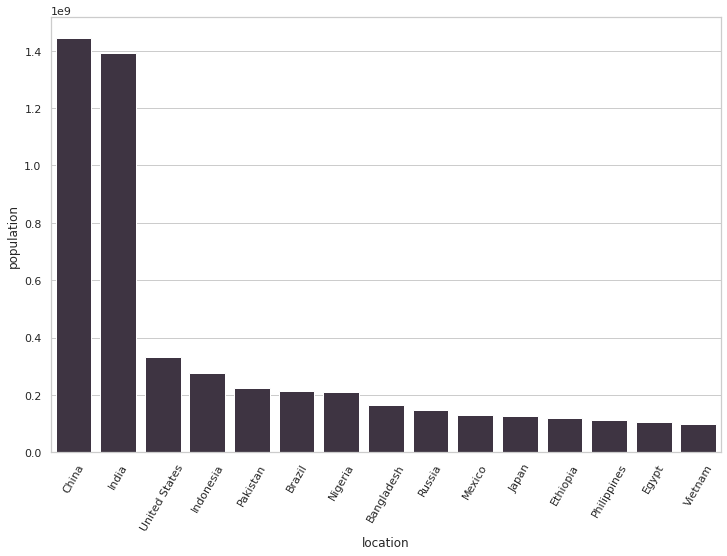

In [6]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
population_chart = sns.barplot(x='location', 
                               y='population', 
                               data=df_population,
                               color='#3F3244')
population_chart.set_xticklabels(population_chart.get_xticklabels(), rotation=60)


In [7]:
df_population_lifeexp = df_covid[['location', 'continent', 'population', 'life_expectancy']].drop_duplicates()


In [8]:
pop_lifeexp_chart = px.scatter(data_frame=df_population_lifeexp, 
                               x='population', 
                               y='life_expectancy',
                               color='continent',
                               color_discrete_sequence=px.colors.qualitative.Prism,
                               title='Life expectancy vs. population by continent',
                               log_x=True)
pop_lifeexp_chart


In [9]:
df_new_cases = df_covid[['location', 'date', 'new_cases']]
countries = ['Germany', 'Russia']
df_new_cases = df_new_cases[df_new_cases['location'].isin(countries)]


In [10]:
ttl_cases_chart = px.line(data_frame=df_new_cases, 
                          x='date', y='new_cases', 
                          color='location',
                          color_discrete_sequence=px.colors.qualitative.T10,
                          title='COVID-19 - new cases daily in Russia and Germany')
ttl_cases_chart


In [11]:
df_map = df_covid[df_covid['date'] == df_covid['date'].max()].copy()
df_map.loc[:, 'cases_per_person'] = df_map['total_cases'] / df_map['population']



In [12]:
my_mapbox_token = 'pk.eyJ1IjoiZGFnbGljaW91cyIsImEiOiJjbGY0M2tzZ3AwN202NDByMHExZzEzZ3l0In0.JieoMwGtGnnvdfjk9nO4Yg'
px.set_mapbox_access_token(my_mapbox_token)


In [13]:
cases_map = px.scatter_mapbox(data_frame=df_map, 
                                  lat='latitude', lon='longitude',
                                  color='continent',
                                  size='cases_per_person',
                                  size_max=20,
                                  hover_data={'location': True, 
                                              'total_cases': True,
                                              'continent': False,
                                              'cases_per_person': False,
                                              'latitude': False,
                                              'longitude': False,
                                              },
                                  zoom=1,
                                  mapbox_style='dark',
                                  title='COVID-19 map - positive cases per person')
cases_map


In [14]:
df_dash_1 = df_covid


In [15]:
countries_list = list(df_dash_1['location'].drop_duplicates())


In [16]:
first_dash_app = dash.Dash()

first_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),                           
    html.P("Choose country:"),
    dcc.Dropdown(
        id='country', 
        options=[{'value': str(country), 'label': country} 
                 for country in countries_list],
        value=countries_list[0]
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="graph-1", style={'display': 'inline-block', 'width': '48%'}),
        dcc.Graph(id="graph-2", style={'display': 'inline-block', 'width': '48%'})
    ])

])


In [17]:
@first_dash_app.callback(
    Output(component_id='graph-1', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_first_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_cases',
        title=f'Cummulative number of positive cases in {country}',
        labels={'total_cases': 'Total cases'}
    )
    return fig


In [18]:
@first_dash_app.callback(
    Output(component_id='graph-2', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_second_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_deaths',
        title=f'Cummulative number of deaths in {country}',
        labels={'total_deaths': 'Total deaths'}
    )
    return fig


In [19]:
thread = threading.Thread(target=first_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)


Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

In [20]:
df_dash_2 = df_covid[df_covid['date'] == df_covid['date'].max()].fillna(0)


INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8050
INFO:werkzeug:Press CTRL+C to quit


In [21]:
metric_dict = {'total_cases': 'Total cases', 
               'total_deaths': 'Total deaths', 
               'total_vaccinations': 'Total vaccinations', 
               'people_fully_vaccinated': 'Number of fully vaccinated people'}


In [22]:
continent_list = list(df_dash_2['continent'].drop_duplicates())


In [23]:
second_dash_app = dash.Dash()

second_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),                           
    html.P("Choose continent:"),
    dcc.Dropdown(
        id='continent', 
        options=[{'value': str(continent), 'label': continent} 
                 for continent in continent_list],
        value=continent_list[0]
        ),
    html.P("Choose metric:"),
    dcc.Dropdown(
        id='metric', 
        options=[{'value': metric, 'label': metric_label} 
                 for metric, metric_label in metric_dict.items()],
        value='total_cases'
        ),       
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="map"),
    ])

])


In [24]:
@second_dash_app.callback(
    Output(component_id='map', component_property='figure'),
    [Input(component_id='continent', component_property='value'),
    Input(component_id='metric', component_property='value')]
)
def generate_covid_map(continent, metric):
    df = df_dash_2[df_dash_2['continent'] == continent]
    map = px.scatter_mapbox(
        data_frame=df,
        lat='latitude', 
        lon='longitude',
        size=df[metric],
        size_max=20,
        hover_data={'location': True},
        mapbox_style='dark',
        zoom=1,
        height=600,
        title=f'COVID-19 - {metric_dict[metric]} in {continent}'
    )
    return map


In [25]:
thread = threading.Thread(target=second_dash_app.run_server, args=("localhost", 851))
thread.start()
output.serve_kernel_port_as_window(port=851)


Dash is running on http://localhost:851/



<IPython.core.display.Javascript object>

In [26]:
third_dash_app = dash.Dash()

third_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),                           
    html.P("Choose top x countries:"),
    dcc.Slider(5, 20, 5,
        value=5,
        id='my-slider'
    ),   
    html.Br(),
    html.Div(children=[
        dcc.Graph(id='first-graph', style={'display':'inline-block', 'width': '48%'}),
        dcc.Graph(id='second-graph', style={'display':'inline-block', 'width': '48%'})
    ])

])


Dash is running on http://localhost:851/



INFO:__main__:Dash is running on http://localhost:851/



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://localhost:851
INFO:werkzeug:Press CTRL+C to quit


In [27]:
@third_dash_app.callback(
    Output(component_id='first-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccinations_graph(n):
    max_date = df_covid['date'].max()
    df = df_covid[df_covid['date'] == max_date].sort_values(by='total_vaccinations', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df,
        x='location',
        y='total_vaccinations',
        title=f'Number of vaccinations',
        labels={'total_vaccinations': 'Total vaccinations'}
    )
    return fig


In [28]:
@third_dash_app.callback(
    Output(component_id='second-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccination_ratio_graph(n):
    max_date = df_covid['date'].max()
    df = df_covid[df_covid['date'] == max_date]
    df['vaccination_ratio'] = df['total_vaccinations'] / df['population']
    df = df.sort_values(by='vaccination_ratio', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df,
        x='location',
        y='vaccination_ratio',
        title=f'Vaccination ratio',
        labels={'vaccination_ratio': 'Vaccination ratio'}
    )
    return fig


In [29]:
thread = threading.Thread(target=third_dash_app.run_server, args=("localhost", 852))
thread.start()
output.serve_kernel_port_as_window(port=852)

Dash is running on http://localhost:852/

Dash is running on http://localhost:852/



<IPython.core.display.Javascript object>

Dash is running on http://localhost:852/



INFO:__main__:Dash is running on http://localhost:852/



 * Serving Flask app '__main__'
